# Exploring the Titanic in R #

### The sinking of the Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1,502 out of 2,224 passengers and crew. ###

### As well as a tragic disaster, the Titanic is a classic film, but did you know the Titanic is also a readily available and popular dataset that's been available for a number of years? This is what we'll be exploring today! ###

<div id = 'titanic'>
    <div class = "inline-block">
        <figure><img src = 'titanic_picture_1.jpg' width = "40%" height = "20%"></figure>
    </div>
    </div>

### It's one of many datasets that are built-in to R, we can access this by loading the [Titanic Package](https://cran.r-project.org/web/packages/titanic/index.html), and this is what we'll be using today to perform some data analyses in R. ###

## What will be covered in the session? ##
This session will be a hands-on exploratory data analyses, including packages commonly used in data analyses:
* [dplyr](http://dplyr.tidyverse.org/) for data wrangling.
* [ggplot2](http://ggplot2.tidyverse.org/) for data visualization.

The aim is to work through all pre-processing and cleaning techniques which we might want to consider when working with any dataset.

The packages are already installed within this environment, but if you wanted to install these in R, you can do so using `install.packages("dplyr")`.

Before we can get started with analyses we need to load the relevant R libraries.

### Load R libraries. ###

In [1]:
library(dplyr)
library(ggplot2)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




We'll then load in the data. The Titanic data consists of two datasets, `train` and `test`, but we'll only use the train data today.

### Load Titanic Train data. ###

In [2]:
train <- read.csv("https://raw.githubusercontent.com/paulhendricks/titanic/master/inst/data-raw/train.csv")

A good first step in understanding your data is to check the structure of the data, such as the data type of each attribute, as well as how many rows and columns (observations and variables in R language) we can do this using `str()`.

### Check the Structure of Titanic data. ### 

In [3]:
str(train)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : chr  "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : chr  "male" "female" "female" "female" ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : chr  "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : chr  "" "C85" "" "C123" ...
 $ Embarked   : chr  "S" "C" "S" "S" ...


### What are the variables in the dataset? ###

* **PassengerId**: Serial Number.
* **Survived**: Contains binary Values of 0 & 1. Passenger did not survive — 0, Passenger Survived — 1.
* **Pclass**: Ticket Class | 1st Class, 2nd Class or 3rd Class Ticket.
* **Name**: Name of the passenger.
* **Sex**: Male or Female.
* **Age**: Age in years — Integer.
* **SibSp**: No. of Siblings / Spouses — brothers, sisters and/or husband/wife.
* **Parch**: No. of parents/children — mother/father and/or daughter, son.
* **Ticket**: Serial Number.
* **Fare**: Passenger fare.
* **Cabin**: Cabin Number.
* **Embarked**: Port of Embarkment | C- Cherbourg, Q — Queenstown, S — Southampton.

Now we know which fields are included in the dataset, we might want to have a look at the raw data before we begin our analyses.

We can do so using `head` to show the first 6 rows, and `tail` to show the last 6 rows.

In [4]:
head(train)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


In [5]:
tail(train)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
886,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39,0,5,382652,29.125,,Q
887,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.000,,S
888,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.000,B42,S
889,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NA,1,2,W./C. 6607,23.450,,S
890,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.000,C148,C
891,891,0,3,"Dooley, Mr. Patrick",male,32,0,0,370376,7.750,,Q


### Check for missing values. ###

We know which fields we have in the dataset, and the size of the dataset, but it's important to consider any missing data.

We can do this using a combination of `is.na` and `colSums`.

In [6]:
colSums(is.na(train))

PassengerId    Survived      Pclass        Name         Sex         Age 
          0           0           0           0           0         177 
      SibSp       Parch      Ticket        Fare       Cabin    Embarked 
          0           0           0           0           0           0

We can see that `Age` has 177 missing values in our Train data. For other values we may want to impute missing values, but for missing ages, we'll leave them as blank.

### Extract Title from the Name field. ###

We can extract title from `Name` using `gsub`. The gsub function replaces all instances of the pattern provided in the specified column of the dataframe. In this instance, we're looking for the characters `,` and `.` and replacing anything outside of this with blank space. 

* `(.*, )` -> any text before and including a comma and space.
* `(\\..*)` -> any text after and including a dot.
* The `|` -> an or operator.
* The gsub will match the first OR second pattern.

'Bloggs, Mr. Joe' would become 'Mr' and would be created as a column called `Title` in the Train dataset.

In [7]:
train$Title <- gsub('(.*, )|(\\..*)', '', train$Name)

We can use `head` again to glimpse at our data to check if this new column is as we'd expect.

In [8]:
head(train)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S,Mr
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C,Mrs
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S,Miss
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,Mrs
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S,Mr
6,6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q,Mr


To get an overview of the data, we can use the function `summary`.

### Summarize Titanic data. ###

In [9]:
summary(train)

  PassengerId       Survived          Pclass          Name          
 Min.   :  1.0   Min.   :0.0000   Min.   :1.000   Length:891        
 1st Qu.:223.5   1st Qu.:0.0000   1st Qu.:2.000   Class :character  
 Median :446.0   Median :0.0000   Median :3.000   Mode  :character  
 Mean   :446.0   Mean   :0.3838   Mean   :2.309                     
 3rd Qu.:668.5   3rd Qu.:1.0000   3rd Qu.:3.000                     
 Max.   :891.0   Max.   :1.0000   Max.   :3.000                     
                                                                    
     Sex                 Age            SibSp           Parch       
 Length:891         Min.   : 0.42   Min.   :0.000   Min.   :0.0000  
 Class :character   1st Qu.:20.12   1st Qu.:0.000   1st Qu.:0.0000  
 Mode  :character   Median :28.00   Median :0.000   Median :0.0000  
                    Mean   :29.70   Mean   :0.523   Mean   :0.3816  
                    3rd Qu.:38.00   3rd Qu.:1.000   3rd Qu.:0.0000  
                    Max.   :80.00 

Now do the same using a pipe `%>%`, one of the handiest tools in Tidyverse. 

This will return exactly the same results as the previous code, but personally I find it easier to read, especially when reviewing code.

In [10]:
train %>% 
  summary()

  PassengerId       Survived          Pclass          Name          
 Min.   :  1.0   Min.   :0.0000   Min.   :1.000   Length:891        
 1st Qu.:223.5   1st Qu.:0.0000   1st Qu.:2.000   Class :character  
 Median :446.0   Median :0.0000   Median :3.000   Mode  :character  
 Mean   :446.0   Mean   :0.3838   Mean   :2.309                     
 3rd Qu.:668.5   3rd Qu.:1.0000   3rd Qu.:3.000                     
 Max.   :891.0   Max.   :1.0000   Max.   :3.000                     
                                                                    
     Sex                 Age            SibSp           Parch       
 Length:891         Min.   : 0.42   Min.   :0.000   Min.   :0.0000  
 Class :character   1st Qu.:20.12   1st Qu.:0.000   1st Qu.:0.0000  
 Mode  :character   Median :28.00   Median :0.000   Median :0.0000  
                    Mean   :29.70   Mean   :0.523   Mean   :0.3816  
                    3rd Qu.:38.00   3rd Qu.:1.000   3rd Qu.:0.0000  
                    Max.   :80.00 

**Recap:**

* We've imported Titanic train data and viewed some of the data.
* We've used the pipe operator `%>%`.

**Next:**

Data wrangling with `dplyr` to:
* **filter** our data to areas of interest.
* **arrange** the data to generate new insights.
* create new features by **mutating** existing ones.

## Wrangle data. ##

We'll start pulling out some initial insights using `dplyr` functionality, such as `filter`, `arrange` and `mutate`.

These are really useful if we wanted to limit (filter) the data to only the observations of interest, or order by a particular value (arrange) or create new columns (mutate).

We can read `dplyr` code like a sentence: start with our "train" data (%>% and then) filter to only return those records where the sex is male `(filter(Sex == "male")`.

Filter to return all "male" rows

In [11]:
train %>% 
  filter(Sex == "male")

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,,S,Mr
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,,S,Mr
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q,Mr
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,,S,Master
13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,,S,Mr
14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,,S,Mr
17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,,Q,Master
18,1,2,"Williams, Mr. Charles Eugene",male,NA,0,0,244373,13.0000,,S,Mr


**Does our data give us any indication about whether men are likely to have survived or not?**

An initial view of the data seems to suggest that men typically did not survive (at least in the data we can see here).

Filter to return all "female" rows.

In [12]:
train %>% 
  filter(Sex == "female")

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,Mrs
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S,Mrs
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,,C,Mrs
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7000,G6,S,Miss
12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.5500,C103,S,Miss
15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14,0,0,350406,7.8542,,S,Miss
16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55,0,0,248706,16.0000,,S,Mrs


**Does our data give us any indication about whether women are likely to have survived or not?**

An initial view of the data suggests that a lot of women did survive. We'll come on to this in more detail a little bit later.

What if we wanted to `arrange` our observations by increasing `Fare` to see if we can notice any trends? We can use `arrange` to achieve this.

`Arrange` by increasing `Fare`.

In [13]:
train %>%
  arrange(Fare)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>
180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0000,,S,Mr
264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0000,B94,S,Mr
272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0000,,S,Mr
278,0,2,"Parkes, Mr. Francis ""Frank""",male,NA,0,0,239853,0.0000,,S,Mr
303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0000,,S,Mr
414,0,2,"Cunningham, Mr. Alfred Fleming",male,NA,0,0,239853,0.0000,,S,Mr
467,0,2,"Campbell, Mr. William",male,NA,0,0,239853,0.0000,,S,Mr
482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NA,0,0,239854,0.0000,,S,Mr
598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0000,,S,Mr


**Does our data give us any indication about whether fare paid has an effect on the chance of survival or not?**

From the data we can see, a lot of the people who paid less did not survive the disaster. That's something interesting that we've just discovered just by re-arranging our data.

The second half of the dataset (those who paid a higher fare) we can see a lot of the people who paid more did survive the disaster. We can confirm this using `arrange` in descending order.

In [14]:
train %>% 
  arrange(desc(Fare))

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>
259,1,1,"Ward, Miss. Anna",female,35.00,0,0,PC 17755,512.3292,,C,Miss
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.00,0,1,PC 17755,512.3292,B51 B53 B55,C,Mr
738,1,1,"Lesurer, Mr. Gustave J",male,35.00,0,0,PC 17755,512.3292,B101,C,Mr
28,0,1,"Fortune, Mr. Charles Alexander",male,19.00,3,2,19950,263.0000,C23 C25 C27,S,Mr
89,1,1,"Fortune, Miss. Mabel Helen",female,23.00,3,2,19950,263.0000,C23 C25 C27,S,Miss
342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.00,3,2,19950,263.0000,C23 C25 C27,S,Miss
439,0,1,"Fortune, Mr. Mark",male,64.00,1,4,19950,263.0000,C23 C25 C27,S,Mr
312,1,1,"Ryerson, Miss. Emily Borie",female,18.00,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,Miss
743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.00,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,Miss


## Creating new variables using `mutate`. ## 

We can also create new variables to add to our dataset, to give us new insights.

We know that the variable "Parch" is the number of parents and children while "SibSp" is the number of siblings and spouses. 

We can add these together to create a new variable "FamSize". To do so, we `mutate` the original variables into the new one.

Create new column `FamSize` (size of family)

In [15]:
train %>% 
  mutate(FamSize = Parch + SibSp)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamSize
<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S,Mr,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C,Mrs,1
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S,Miss,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,Mrs,1
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S,Mr,0
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q,Mr,0
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,Mr,0
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S,Master,4
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S,Mrs,2


**Is it possible that larger families have a lower rate of survival?**

To test this, we can use our new variable "FamSize" and arrange by decreasing "FamSize".

In [16]:
train %>% 
  mutate(FamSize = Parch + SibSp) %>% 
  arrange(desc(FamSize))

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamSize
<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>
160,0,3,"Sage, Master. Thomas Henry",male,NA,8,2,CA. 2343,69.5500,,S,Master,10
181,0,3,"Sage, Miss. Constance Gladys",female,NA,8,2,CA. 2343,69.5500,,S,Miss,10
202,0,3,"Sage, Mr. Frederick",male,NA,8,2,CA. 2343,69.5500,,S,Mr,10
325,0,3,"Sage, Mr. George John Jr",male,NA,8,2,CA. 2343,69.5500,,S,Mr,10
793,0,3,"Sage, Miss. Stella Anna",female,NA,8,2,CA. 2343,69.5500,,S,Miss,10
847,0,3,"Sage, Mr. Douglas Bullen",male,NA,8,2,CA. 2343,69.5500,,S,Mr,10
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NA,8,2,CA. 2343,69.5500,,S,Miss,10
60,0,3,"Goodwin, Master. William Frederick",male,11,5,2,CA 2144,46.9000,,S,Master,7
72,0,3,"Goodwin, Miss. Lillian Amy",female,16,5,2,CA 2144,46.9000,,S,Miss,7


**Does our data give us any indication about whether larger families had an impact on the chance of survival or not?**

From the data we can see, some families had 7 or 10 members on-board, and all of the largest families we can see did not survive.

We can also use `mutate` to amend existing columns, we might want to re-assign 0 and 1 in the "Survived" column to a Yes or No.

Turn numerical values of Survived column to "No" & "Yes" (but assign to a new dataframe)

In [17]:
survived <- train %>%
  mutate(Survived = ifelse(Survived == 0, "No", "Yes"))

In [18]:
head(survived)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
,<int>,<chr>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>
1,1,No,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S,Mr
2,2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C,Mrs
3,3,Yes,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S,Miss
4,4,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,Mrs
5,5,No,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S,Mr
6,6,No,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q,Mr


Notice that the Survived column has amended 0 to No, and 1 to Yes, which makes the dataset a little more user-friendly.

**Recap:**

* We've imported our Titanic train data and viewed some of the data.
* We've used the pipe operator `%>%`.
* We can now use `dplyr` to wrangle our data to `filter`, `arrange` and create new features by `mutating` existing ones.

**Next:**

* We'll plot our data using `ggplot2` to get a visual view to derive new insights.

## Plotting data

To plot our data using `ggplot2`, we need to specify three things:

* Data
* Aesthetics (e.g. what's on the x-axis and y-axis)
* Plot (e.g. barplot, scatterplot)

**About ggplot:**

* We can read the `ggplot2` code like a sentence to understand what is happening: 

`ggplot(train, aes(x = Age, y = Fare)) +
  geom_point()`

**How to read the code**

We take the titanic `train` data and we map `Age` to the x axis and `Fare` to the y axis, we then add points on as the layer of the plot.

The first question that springs to mind regarding the Titanic is **"How many people survived?"**

Plot barplot of passenger surivival rate.

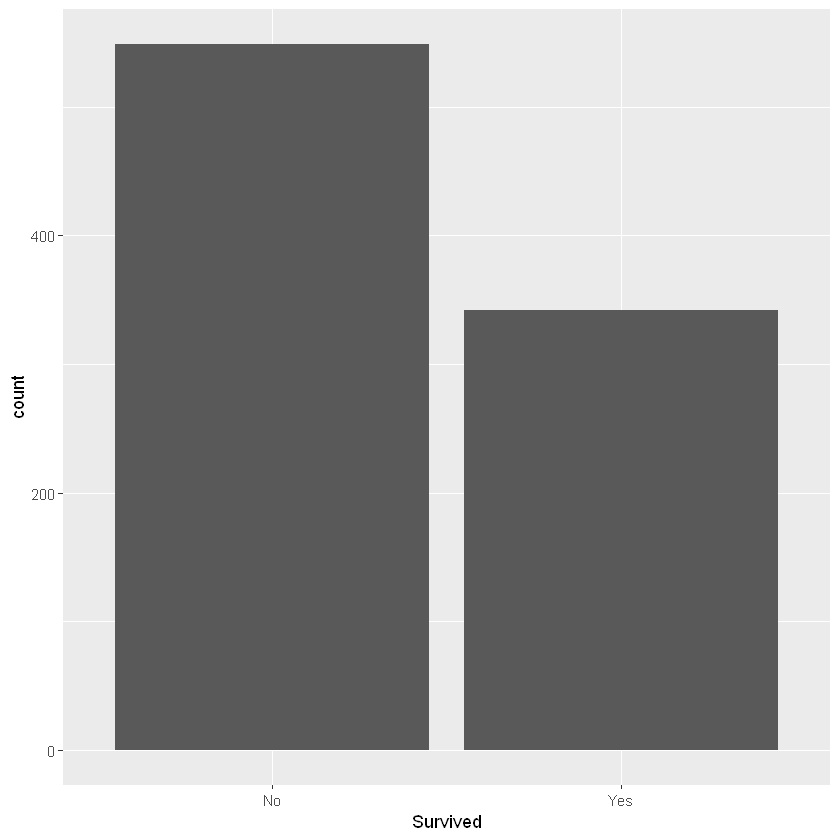

In [19]:
ggplot(survived, aes(x = Survived)) +
  geom_bar()

This is useful, but it's quite tricky to see from this plot to know what proportion survived. We can make this clearer by returning the proportion. We can do so using the `prop.table` function.

In [20]:
prop.table(table(survived$Survived))


       No       Yes 
0.6161616 0.3838384 

We can see that only 38.4% of all passengers who on-boarded the Titanic survived.

We might want to investigate if the Age of any given passenger correlates with the fare paid. We can do this using a scatterplot, know as `geom_point` in `ggplot`.

Scatter plot of `Age` vs `Fare`.

Warning message:
"Removed 177 rows containing missing values (geom_point)."


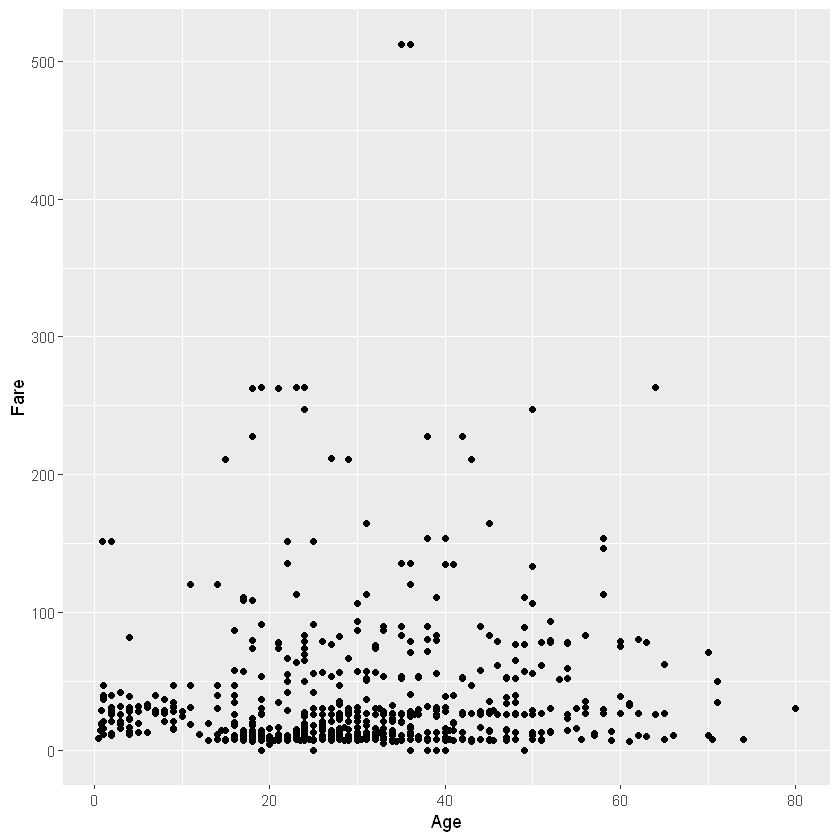

In [21]:
ggplot(survived, aes(x = Age, y = Fare)) +
  geom_point()

*We receive a warning above the plot, the 177 records have been removed with missing values. This is because of those NULL values we identified earlier.*

**Does our data give us any indication about whether there was any correlation between fare paid and age of the passenger?**

We can see that the majority of points within the data have a fare of £100 or less. There are also two notable outliers who had a fare greater than £500!

If we use the previous barplot and colour each point by `Sex` to see if there are any correlations between `Sex`, `Age` and `Fare`.

Scatter plot of `Age` vs `Fare` coloured by `Sex`.

Warning message:
"Removed 177 rows containing missing values (geom_point)."


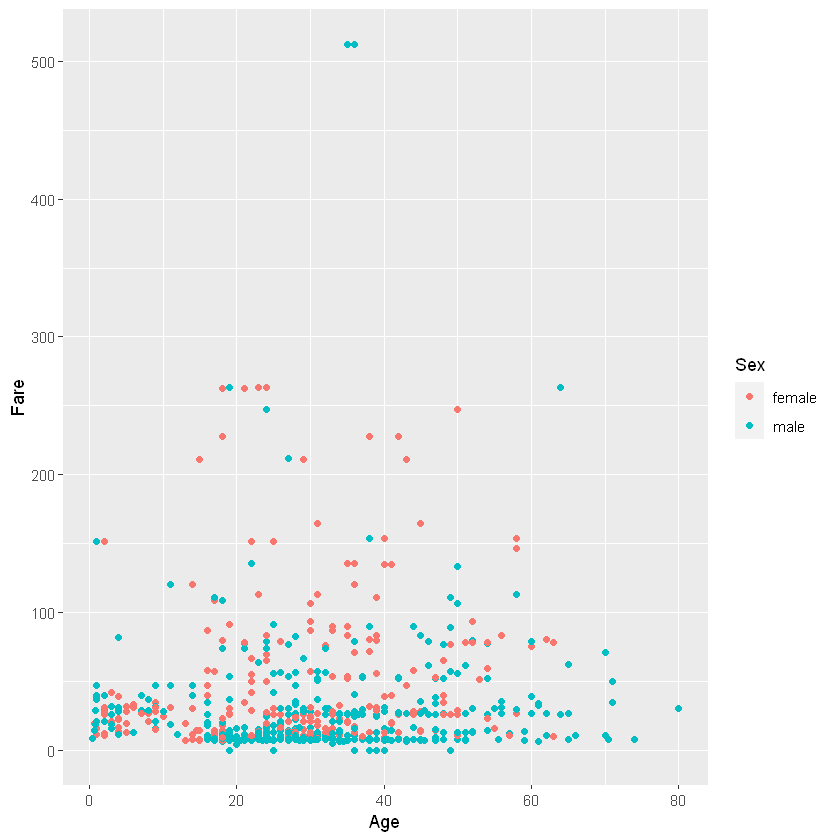

In [22]:
ggplot(survived, aes(x = Age, y = Fare, color = Sex)) +
  geom_point()

The plot above is useful, we can now see the data points are coloured by sex, as well as our original fare and age, but what if we wanted to add the Survived variable to the plot, to see if that shows us anything of interest?

**We can use `facet_grid` to produce multiple plots at the same time**

Scatter plot of `Age` and `Fare` coloured by `Sex` and faceted by `Survived`.

Warning message:
"Removed 177 rows containing missing values (geom_point)."


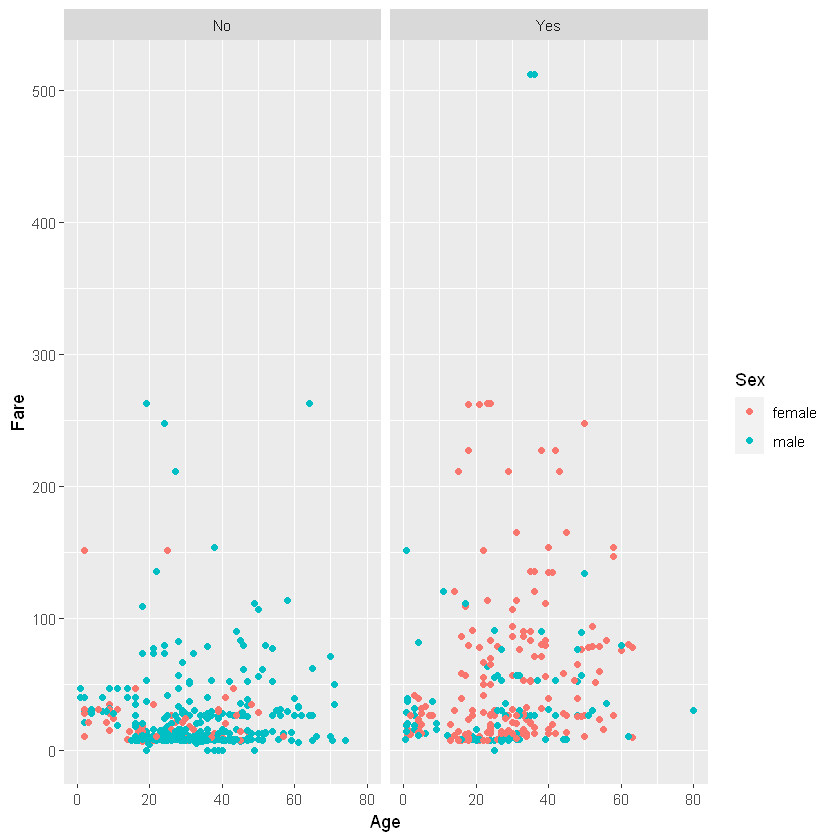

In [23]:
ggplot(survived, aes(x = Age, y = Fare, color = Sex)) +
  geom_point() +
  facet_grid(~Survived)

**Does our data give us any indication about whether Sex had an impact on the chance of survival or not?** 

We see that the survival rate amongst women was significantly higher when compared to men.

It is believed that in case of rescue operations during disasters, women's safety is prioritised. It certainly looks as though this is the case, with women much more likely to survive.

We can create a bar plot to see if this was the case overall, by plotting Sex and whether they survived or not.

Plot barplot of passenger `Sex` and fill by `Survived`.

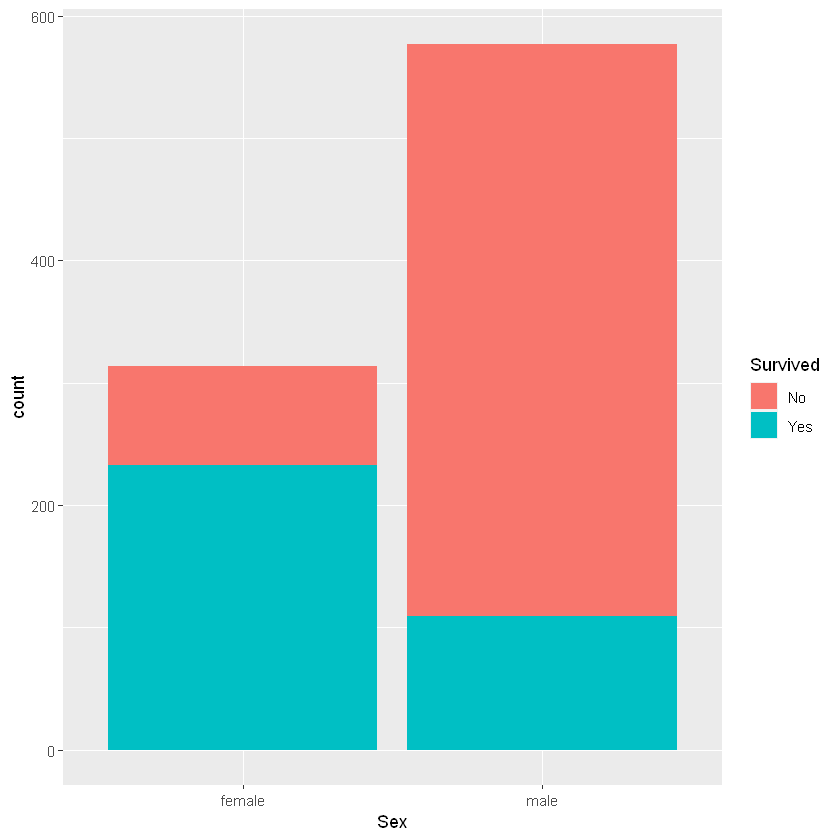

In [24]:
ggplot(survived, aes(x = Sex, fill = Survived)) +
  geom_bar()

**Does our data give us any indication about whether Sex had an impact on the chance of survival or not?** 

We see that the survival rate amongst women was significantly higher when compared to men.

Can we see any differences depending on the type of ticket they held? This can be determined using the `pclass` variable e.g. 1st, 2nd or 3rd class.

Plot barplot of `Pclass` and fill by `Survived`.

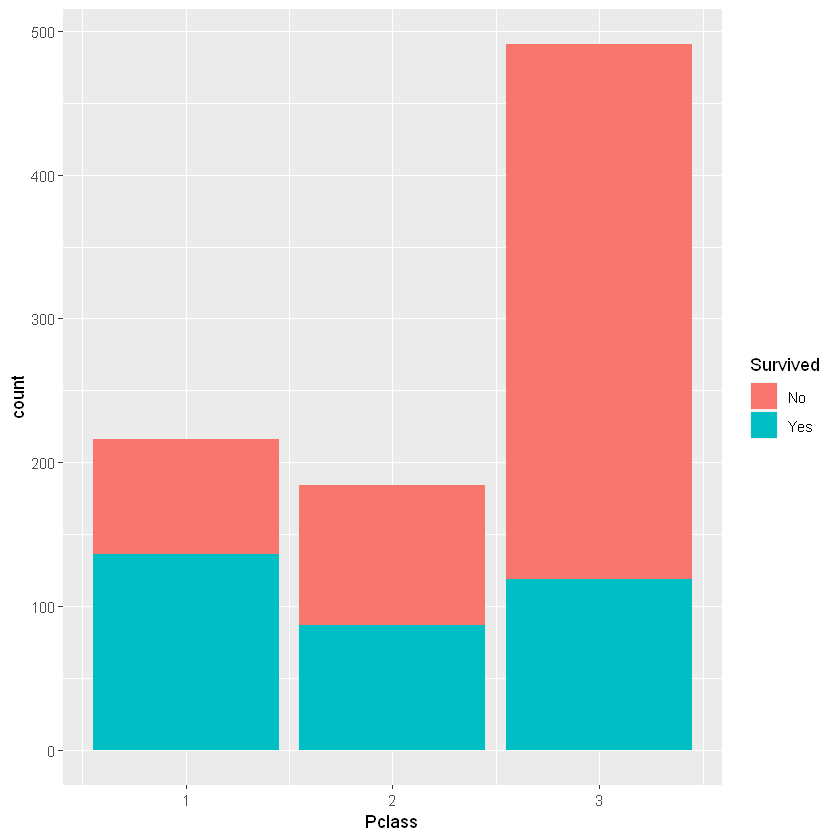

In [25]:
ggplot(survived, aes(x = Pclass, fill = Survived)) +
  geom_bar()

**Does our data give us any indication about whether class had an impact on the chance of survival or not?** 

There were 3 groups of passengers, depending upon the class they were travelling in - 1st class, 2nd class and 3rd class. 

We see that over 50% of the passengers were travelling in the 3rd class, but a much higher proportion of passengers in 1st class survived.

Could it be preferential treatment why the passengers travelling first class, or could it be because the 3rd class compartments were in the lower extremity of the ship? Or could it be down to the placement of the lifeboats and how accessible they are to each class?

Warning message:
"Removed 177 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 2 rows containing missing values (geom_bar)."


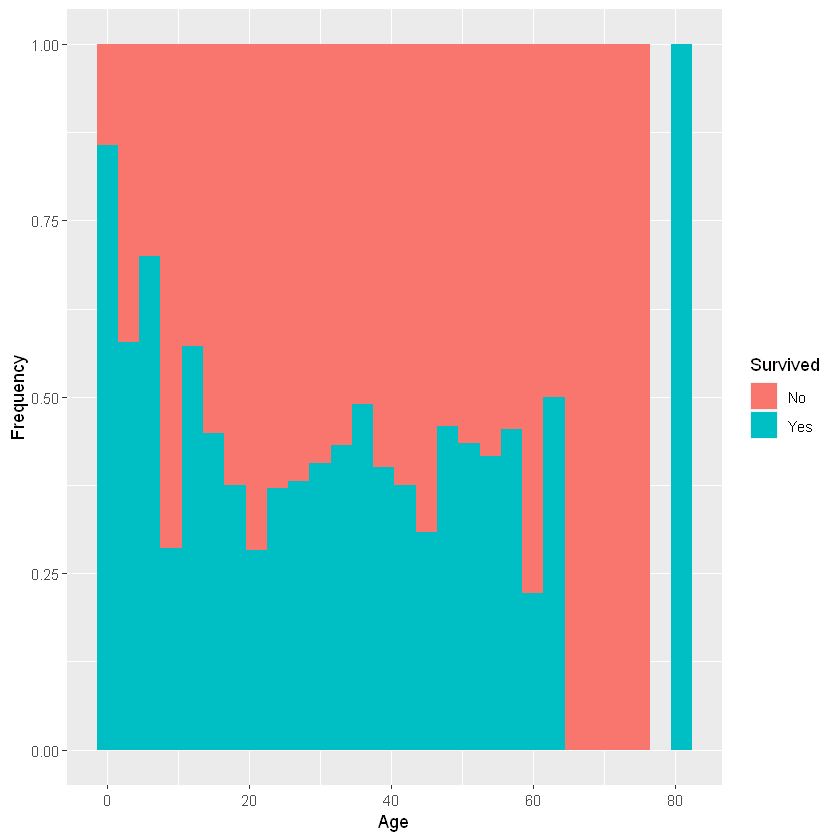

In [26]:
ggplot(survived, aes(x = Age, fill = Survived)) +
  geom_histogram(binwidth = 3, position = "fill") +
  ylab("Frequency")

**Does our data give us any indication about whether age had an impact on the chance of survival or not?** 

We can see that young children, particularly up to 10 years old, had a greater chance of survival. From the previous plot we see that women are more likely to survive than men. 

The captain explicitly issued an order for women and children to be saved first. As a result, the survival rate for women was three times higher than for men.

**Recap:**

* We've imported our Titanic train data and viewed some of the data.
* We've used the pipe operator `%>%`.
* We can use `dplyr` to wrangle our data to `filter`, `arrange` and create new features by `mutating` existing ones.
* We've plotted our data using `ggplot2`.

**Next:**

* Learn how to `summarise` our data.


## Summarizing and grouping data ##

The summarize function reduces a data frame to a summary of just one vector or value. Many times, these summaries are calculated by grouping observations using a factor or categorical variables first. 

Use the `summarise` function to find out the mean fare paid.

In [27]:
train %>% 
  summarise(meanFare = mean(Fare))

meanFare
<dbl>
32.20421


We can use the `filter` and `summarise` functions to find out the mean fare paid among men.

In [28]:
train %>% 
  filter(Sex == "male") %>% 
  summarise(meanFare = mean(Fare))

meanFare
<dbl>
25.52389


Use `filter` and `summarise` functions to find out the mean fare paid among women.

In [29]:
train %>%
  filter(Sex == "female") %>%
  summarise(meanFare = mean(Fare))

meanFare
<dbl>
44.47982


We can extend on this again, using the `filter` and `summarise` functions to find out the mean fare paid among women **and** how many women survived.

In [30]:
train %>% 
  filter(Sex == "female") %>%
  summarise(meanFare = mean(Fare), 
            NumSurv = sum(Survived))

meanFare,NumSurv
<dbl>,<int>
44.47982,233


We can use Use the `group_by` and `summarise` functions to find the mean fare and number of survivors and group by `Sex`.

In [31]:
train %>% 
  group_by(Sex) %>% 
  summarise(meanFare = mean(Fare),
            NumSurv = sum(Survived))

Sex,meanFare,NumSurv
<chr>,<dbl>,<int>
female,44.47982,233
male,25.52389,109


Use the `group_by` and `summarise` functions to find the mean fare and proportion of survivors and group by `Sex`.

In [32]:
train %>% 
  group_by(Sex) %>% 
  summarise(meanFare = mean(Fare),
            NumSurv = sum(Survived)/n())

Sex,meanFare,NumSurv
<chr>,<dbl>,<dbl>
female,44.47982,0.7420382
male,25.52389,0.1889081


Finally, we can do the same using PClass to see if the class of ticket has any significant impact on survival?

In [33]:
train %>% 
  group_by(Pclass) %>% 
  summarise(meanFare = mean(Fare),
            NumSurv = sum(Survived)/n())

Pclass,meanFare,NumSurv
<int>,<dbl>,<dbl>
1,84.15469,0.6296296
2,20.66218,0.4728261
3,13.67555,0.2423625


**Does our data give us any indication about whether class had an impact on the chance of survival or not?**

* Around 6 in 10 passengers within first class survived.
* Around 5 in 10 passengers within second class survived.
* Around 2 in 10 passengers within third class survived. 

## In Summary ##

* We've imported the Titanic train data and viewed some of the data.
* We've used the pipe operator `%>%`.
* We can use `dplyr` to wrangle our data to `filter`, `arrange` and create new features by `mutating` existing ones.
* We can plot our data using `ggplot2`.
* We can summarise our data using `summarise`.

## Interested to know more? ##

Feel free to play around and do your own exploratory analysis, thinking about which fields you could explore or combine to create new insights.

## Thanks for joining! ##